In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob 

In [31]:
# Extracting path of individual image stored in a given directory 
images = glob.glob('./data/Images/*') 

In [32]:
# change calibration grid
BOARD_SIZE_1 = [20, 28]
BOARD_SIZE_2 = [34, 50]

In [33]:
BOARD_SIZE = BOARD_SIZE_2

In [34]:
# world coordinates of circular grid 
step = 10
x_centers = BOARD_SIZE[0]
y_centers = BOARD_SIZE[1]
points = BOARD_SIZE[0] * BOARD_SIZE[1]


In [35]:
obj3d = np.zeros((points, 3), np.float32)
x_array = list(range(0, x_centers * step + step, step))
y_array = list(range(0, y_centers * step + step, step))
for i in range(0, points): 
    obj3d[i] = (x_array[i // y_centers], y_array[i % y_centers], 0) 


In [36]:
obj3d.shape

(1700, 3)

In [37]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [38]:
# Vector to store 3D points 
obj_points = [] 
# Vector to store 2D points 
img_points = [] 

In [39]:
########################################Blob Detector##############################################
# Setup SimpleBlobDetector parameters.
blobParams = cv2.SimpleBlobDetector_Params()
# Change thresholds
blobParams.minThreshold = 8
blobParams.maxThreshold = 255
# Filter by Area.
blobParams.filterByArea = True
blobParams.minArea = 50   
blobParams.maxArea = 2500  
# Filter by Circularity
blobParams.filterByCircularity = True
blobParams.minCircularity = 0.1
# Filter by Convexity
blobParams.filterByConvexity = True
blobParams.minConvexity = 0.87
# Filter by Inertia
blobParams.filterByInertia = True
blobParams.minInertiaRatio = 0.01
# Create a detector with the parameters
blobDetector = cv2.SimpleBlobDetector_create(blobParams)

In [40]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

1724
1724
1727
1727
1734
1734


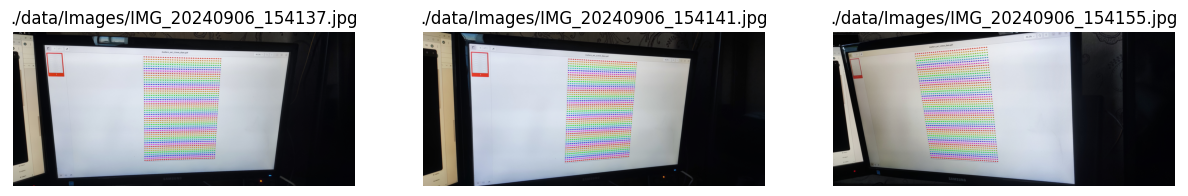

In [41]:
# Extracting path of individual image stored in a given directory 
num_images = len(images)
fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 5))

for idx, img_path in enumerate(images):
    img = cv2.imread(img_path)     
    
    # Уменьшаем изображение вдвое
    # height, width = img.shape[:2]
    # img_resized = cv2.resize(img, (int(width/2), int(height/2)))
    # Conversion to grayscale image 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    keypoints = blobDetector.detect(gray)
    print(len(keypoints))
    # keypoints = sorted(keypoints, key=lambda x: x.size, reverse=True)[:points]
    
    print(len(keypoints))
    im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    im_with_keypoints_gray = cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findCirclesGrid(im_with_keypoints, (BOARD_SIZE[0],BOARD_SIZE[1]), None, flags = cv2.CALIB_CB_SYMMETRIC_GRID)   # Find the circle grid
    # corners = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=30, param2=15, minRadius=0, maxRadius=0) 

    objpoints.append(obj3d)  # Certainly, every loop obj3d is the same, in 3D.

    corners2 = cv2.cornerSubPix(im_with_keypoints_gray, corners, (11,11), (-1,-1), criteria)    # Refines the corner locations.
    imgpoints.append(corners2)
    # Draw and display the corners.
    im_with_keypoints = cv2.drawChessboardCorners(img, (BOARD_SIZE[0],BOARD_SIZE[1]), corners2, ret)
    # Отображаем изображение в соответствующем подграфике
    axes[idx].imshow(cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2RGB))  # Преобразуем BGR в RGB для отображения
    axes[idx].set_title(img_path)
    axes[idx].axis('off') 
    
    # cv2.imwrite(f'./data/Images/output{idx}.jpg', im_with_keypoints) #To save corner-drawn image 
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [28]:
ret, mtx, dist, rvecs, tvecs

(239.72409833240508,
 array([[6.99252495e+03, 0.00000000e+00, 1.98542578e+03],
        [0.00000000e+00, 5.92998884e+04, 1.02149461e+03],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-1.52981852e-02, -6.48474491e+02, -1.41514457e+00,
          3.60683889e-03,  8.31357151e+04]]),
 (array([[-1.13432359],
         [-1.31548247],
         [ 1.28262023]]),
  array([[-0.99840001],
         [-1.45846481],
         [ 1.44585985]]),
  array([[1.4595951 ],
         [0.50504059],
         [0.58906094]])),
 (array([[-1.69757221e+01],
         [-1.97005947e+02],
         [ 1.70813105e+04]]),
  array([[  280.27193969],
         [ -181.24816183],
         [16939.47877628]]),
  array([[-1059.68466616],
         [  -31.75812178],
         [11864.61360572]])))